In [1]:
# munging imports
import pandas as pd
import numpy as np
import statsmodels.api as sm

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score 
from sklearn.metrics import precision_recall_curve, f1_score, fbeta_score 
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('crashdata_nodummy.csv')


In [2]:
df.head()

,state_number,land_use_name,functional_system_name,vehicle_make_name,body_type_name,age,sex,person_type_name,restraint_system_helmet_use_name,indication_of_misuse_of_restraint_system_helmet,air_bag_deployed_name,ejection_name,police_reported_alcohol_involvement,timestamp_of_crash,day_of_week_num,season,Holiday,fatal_serious
0,4,Urban,Minor Arterial,NaN,NaN,59,Female,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not Applicable,Unknown (Police Reported),2016-12-29 18:41:00+00:00,3,1,0,1
1,21,Rural,Interstate,NaN,NaN,55,Male,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not Applicable,No (Alcohol Not Involved),2016-09-16 18:50:00+00:00,4,4,0,1
2,48,Urban,Principal Arterial – Other,NaN,NaN,41,Female,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not Applicable,Not Reported,2016-10-12 20:43:00+00:00,2,4,0,1
3,1,Rural,Minor Arterial,NaN,NaN,59,Male,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not Applicable,No (Alcohol Not Involved),2016-05-23 08:30:00+00:00,0,2,0,1
4,6,Urban,Principal Arterial – Other,NaN,NaN,89,Female,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not Applicable,Unknown (Police Reported),2016-08-11 18:36:00+00:00,3,3,0,1


In [3]:
df1 = df.drop(columns = ['air_bag_deployed_name',\
'ejection_name', 'timestamp_of_crash'])

In [4]:
df1.head()

,state_number,land_use_name,functional_system_name,vehicle_make_name,body_type_name,age,sex,person_type_name,restraint_system_helmet_use_name,indication_of_misuse_of_restraint_system_helmet,police_reported_alcohol_involvement,day_of_week_num,season,Holiday,fatal_serious
0,4,Urban,Minor Arterial,NaN,NaN,59,Female,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Unknown (Police Reported),3,1,0,1
1,21,Rural,Interstate,NaN,NaN,55,Male,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,No (Alcohol Not Involved),4,4,0,1
2,48,Urban,Principal Arterial – Other,NaN,NaN,41,Female,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not Reported,2,4,0,1
3,1,Rural,Minor Arterial,NaN,NaN,59,Male,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,No (Alcohol Not Involved),0,2,0,1
4,6,Urban,Principal Arterial – Other,NaN,NaN,89,Female,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Unknown (Police Reported),3,3,0,1


In [5]:
y = df1.pop('fatal_serious')

In [6]:
X = df1

In [7]:
df1.head()

,state_number,land_use_name,functional_system_name,vehicle_make_name,body_type_name,age,sex,person_type_name,restraint_system_helmet_use_name,indication_of_misuse_of_restraint_system_helmet,police_reported_alcohol_involvement,day_of_week_num,season,Holiday
0,4,Urban,Minor Arterial,NaN,NaN,59,Female,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Unknown (Police Reported),3,1,0
1,21,Rural,Interstate,NaN,NaN,55,Male,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,No (Alcohol Not Involved),4,4,0
2,48,Urban,Principal Arterial – Other,NaN,NaN,41,Female,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Not Reported,2,4,0
3,1,Rural,Minor Arterial,NaN,NaN,59,Male,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,No (Alcohol Not Involved),0,2,0
4,6,Urban,Principal Arterial – Other,NaN,NaN,89,Female,Pedestrian,Not a Motor Vehicle Occupant,Not a Motor Vehicle Occupant,Unknown (Police Reported),3,3,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state=42)

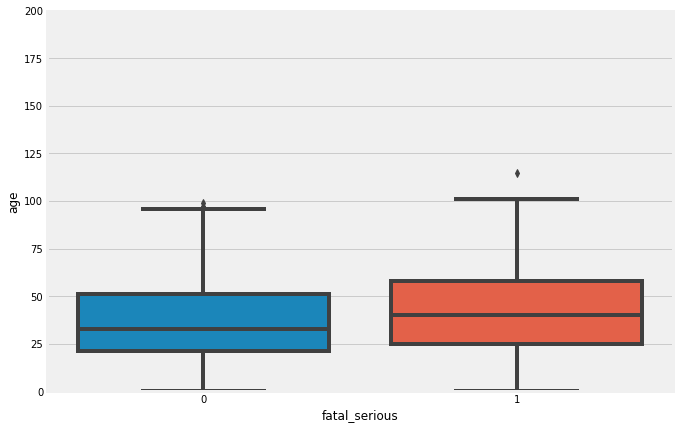

In [106]:
sns.boxplot(x = 'fatal_serious', y = 'age', data = df)
#ax.set(ylim=(0, 200))
plt.rcParams["figure.figsize"] = (7, 7)
plt.ylim(0, 200)
plt.savefig('age_boxplot.png')

Earlier CSV was with **string categorical variables and no dummies**. Running the random forest model would need label encoding those cateogircal variables. In the meantime, I used the **csv with dummies** for the random forest model. 

# Initial Random Forest Model

In [36]:
dummydf = pd.read_csv('crashdata.csv')

In [13]:
dummydf.head()

,age,sex_Male,air_bag_deployed_name,ejection_name,timestamp_of_crash,fatal_serious,vehicle_make_name_Ford,vehicle_make_name_Chevrolet,vehicle_make_name_Toyota,vehicle_make_name_Honda,...,day_of_week_num_1,day_of_week_num_2,day_of_week_num_3,day_of_week_num_4,day_of_week_num_5,day_of_week_num_6,season_2,season_3,season_4,Holiday
0,59,0,Not a Motor Vehicle Occupant,Not Applicable,2016-12-29 18:41:00+00:00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,55,1,Not a Motor Vehicle Occupant,Not Applicable,2016-09-16 18:50:00+00:00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,41,0,Not a Motor Vehicle Occupant,Not Applicable,2016-10-12 20:43:00+00:00,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,59,1,Not a Motor Vehicle Occupant,Not Applicable,2016-05-23 08:30:00+00:00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,89,0,Not a Motor Vehicle Occupant,Not Applicable,2016-08-11 18:36:00+00:00,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [14]:
dum_df = dummydf.drop(columns = ['air_bag_deployed_name',\
'ejection_name', 'timestamp_of_crash'])

In [15]:
y = dum_df.pop('fatal_serious')
X = dum_df

### Train-val-test split

In [17]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.25, random_state=3)
# train_df = X_train.copy()
# train_df['fatal_serious'] = y_train
# train_df.head()

(0.0, 200.0)

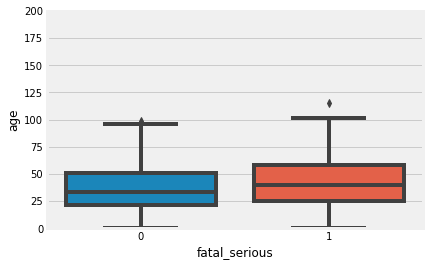

In [18]:
# sns.boxplot(x = 'fatal_serious', y = 'age', data = df)
# #ax.set(ylim=(0, 200))
# plt.ylim(0, 200)

In [19]:
from sklearn.model_selection import train_test_split

def quick_test(model, X_tr, y_tr):
    xtrain, xval, ytrain, yval = train_test_split(X_tr, y_tr, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xval, yval)

def quick_test_afew_times(model, X_tr, y_tr, n=10):
    return np.mean([quick_test(model, X_tr, y_tr) for j in range(n)])

In [20]:
randomforest = RandomForestClassifier(n_estimators=100)
quick_test_afew_times(randomforest, X_tr, y_tr)

0.7564084770191639

In [21]:
imp = randomforest.feature_importances_

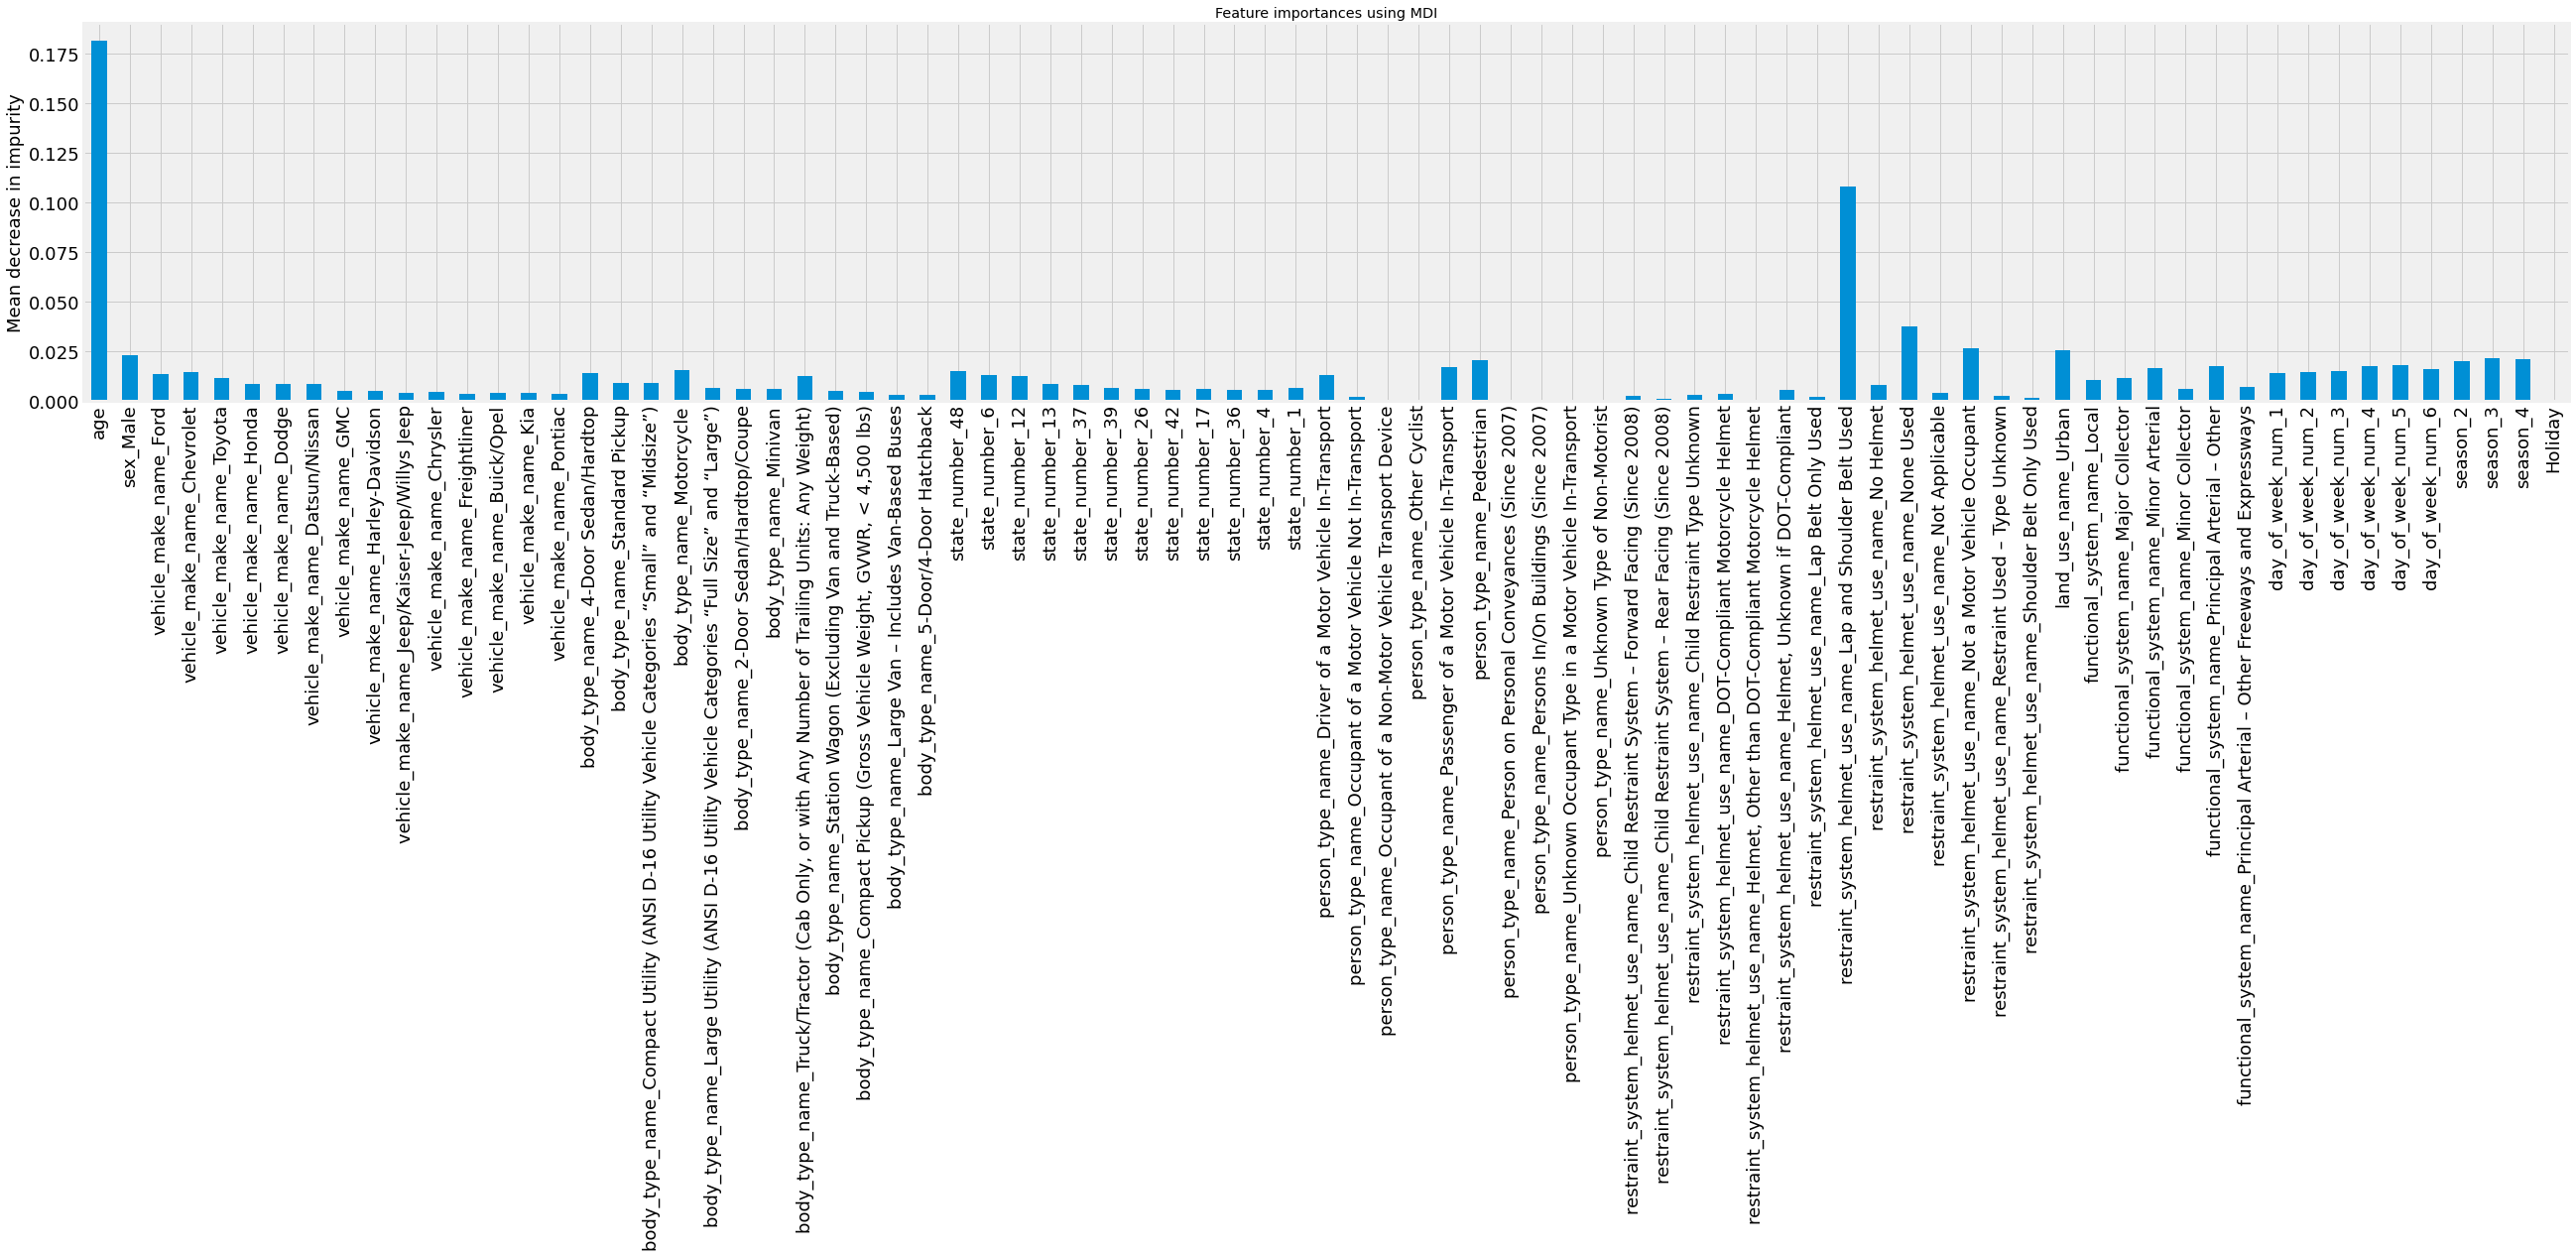

In [148]:
forest_importances = pd.Series(imp, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
plt.rcParams["figure.figsize"] = (40, 7)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Feature importance", fontsize=40)
#plt.xlabel("F score", fontsize=16)
plt.ylabel("Features", fontsize=18)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()
plt.savefig('features.png')

In [38]:
sorted(list(zip(imp, X.columns)),key = lambda x: x[0])[:10:-1]

[(0.18111211447216802, 'age'),
 (0.10795854624807066,
  'restraint_system_helmet_use_name_Lap and Shoulder Belt Used'),
 (0.03753969098064292, 'restraint_system_helmet_use_name_None Used'),
 (0.02629554631714031,
  'restraint_system_helmet_use_name_Not a Motor Vehicle Occupant'),
 (0.02515651890919481, 'land_use_name_Urban'),
 (0.022961548466272477, 'sex_Male'),
 (0.02146509512258952, 'season_3'),
 (0.02094172989077574, 'season_4'),
 (0.020477245771944323, 'person_type_name_Pedestrian'),
 (0.019672734813502745, 'season_2'),
 (0.017954237369471854, 'day_of_week_num_5'),
 (0.01754085566934234, 'functional_system_name_Principal Arterial – Other'),
 (0.017216321147019965, 'day_of_week_num_4'),
 (0.01711671644686527,
  'person_type_name_Passenger of a Motor Vehicle In-Transport'),
 (0.016556543499709673, 'functional_system_name_Minor Arterial'),
 (0.016042766790870088, 'day_of_week_num_6'),
 (0.015435572417670495, 'body_type_name_Motorcycle'),
 (0.014986385603705667, 'day_of_week_num_3'),
 

In [39]:
preds_rf = randomforest.predict(X_val)

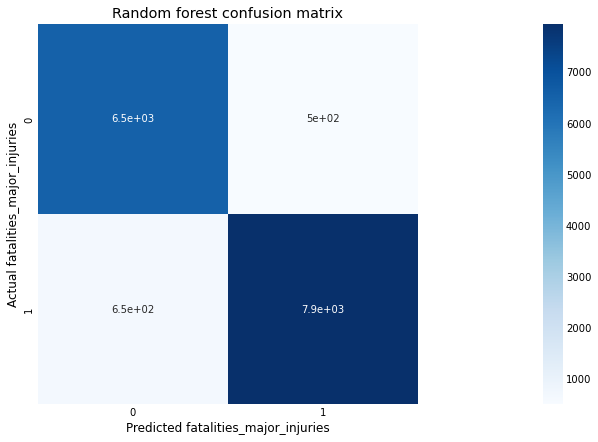

In [40]:
# Print confusion matrix for random forest
rf_confusion = confusion_matrix(y_val, preds_rf)
plt.figure#(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True)
           #xticklabels=iris_dataset['target_names'],
           #yticklabels=iris_dataset['target_names'])

plt.xlabel('Predicted fatalities_major_injuries')
plt.ylabel('Actual fatalities_major_injuries')
plt.title('Random forest confusion matrix');

plt.savefig("confusion_matrix_rf")

In [107]:
# using the default threshold of 0.5
#y_predict = lm.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, preds_rf), 
                                                     recall_score(y_val, preds_rf)))
rf_f1 = f1_score(y_val, preds_rf)
print('F1: %.4f' % (rf_f1))

Default threshold:
Precision: 0.9410,   Recall: 0.9244
F1: 0.9326


In [33]:
#The above outputs are a little suspect givent that the validated score of the Random
#Forest Model was 0.756
# using a threshold of 0.06
y_proba1_rf = (randomforest.predict_proba(X_val)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_proba1_rf), 
                                                     recall_score(y_val, y_proba1_rf)))


Threshold of 0.06:
Precision: 0.6072,   Recall: 0.9981


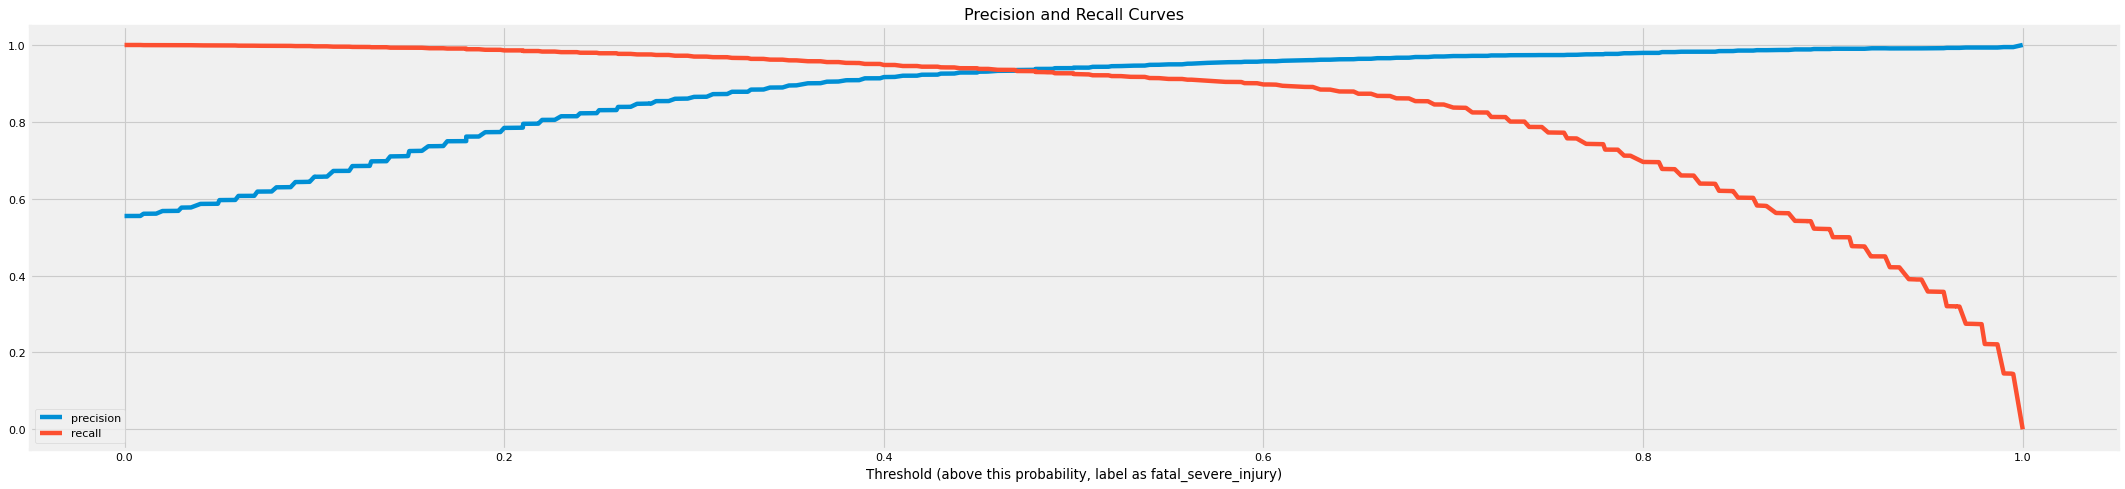

In [35]:
# Precision & recall curve

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, randomforest.predict_proba(X_val)[:,1])
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fatal_severe_injury)');
plt.title('Precision and Recall Curves');

# Logistic Regression Model

In [41]:
#SINGLE FEATURE
lm1 = LogisticRegression()
lm1.fit(X_train[['age']], y_train)

LogisticRegression()

In [42]:
X_train.head()

,age,sex_Male,vehicle_make_name_Ford,vehicle_make_name_Chevrolet,vehicle_make_name_Toyota,vehicle_make_name_Honda,vehicle_make_name_Dodge,vehicle_make_name_Datsun/Nissan,vehicle_make_name_GMC,vehicle_make_name_Harley-Davidson,...,day_of_week_num_1,day_of_week_num_2,day_of_week_num_3,day_of_week_num_4,day_of_week_num_5,day_of_week_num_6,season_2,season_3,season_4,Holiday
36936,47,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48365,38,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18931,37,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7186,77,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
69906,64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [43]:
lm1.score(X_train[['age']], y_train)

0.5548129484113427

In [44]:
lm1.coef_, lm1.intercept_

(array([[0.00146627]]), array([0.15801489]))

In [45]:
##TWO FEATURES
#std_scale = StandardScaler()

#X_train = X_train[['age', 'sex_Male']]
#X_train_scaled = std_scale.fit_transform(X_train)

lm2 = LogisticRegression()
lm2.fit(X_train[['age', 'sex_Male']], y_train)

y_predict2 = lm2.predict(X_train[['age', 'sex_Male']]) 
lm2.score(X_train[['age', 'sex_Male']], y_train)

0.5548129484113427

In [46]:
X_train.head()

,age,sex_Male,vehicle_make_name_Ford,vehicle_make_name_Chevrolet,vehicle_make_name_Toyota,vehicle_make_name_Honda,vehicle_make_name_Dodge,vehicle_make_name_Datsun/Nissan,vehicle_make_name_GMC,vehicle_make_name_Harley-Davidson,...,day_of_week_num_1,day_of_week_num_2,day_of_week_num_3,day_of_week_num_4,day_of_week_num_5,day_of_week_num_6,season_2,season_3,season_4,Holiday
36936,47,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48365,38,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18931,37,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7186,77,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
69906,64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [49]:
#16 FEATURES FROM EDA & FEATURE IMPORTANCE OF RANDOM FOREST MODEL
lm3 = LogisticRegression(max_iter = 100000000)
lm3.fit(X_train[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']], y_train)

lm3.score(X_train[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']], y_train)


In [50]:
lm3.intercept_, lm3.coef_

(array([0.45075552]),
 array([[ 1.45147949e-03, -1.62227445e-01, -4.87075399e-01,
          1.51773602e+00,  3.15118113e+00, -5.88254572e-01,
         -8.16762137e-02, -7.04883371e-02,  3.49131054e-01,
         -1.04681703e-01, -7.69061706e-03, -1.72813053e-03,
          2.90644860e+00, -5.71124657e-01,  4.23741203e-02,
          2.48547290e-01]]))

## 16 feature logistic regression model with Statsmodel to obtain t-stats 

In [51]:
lm_4 = sm.Logit(y_train, 
                sm.add_constant(X_train[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']]))  # and then `x`
lm_4 = lm_4.fit()

Optimization terminated successfully.
         Current function value: 0.530443
         Iterations 7


/home/ipsita/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          fatal_serious   No. Observations:                46832
Model:                          Logit   Df Residuals:                    46815
Method:                           MLE   Df Model:                           16
Date:                Thu, 28 Oct 2021   Pseudo R-squ.:                  0.2280
Time:                        21:34:48   Log-Likelihood:                -24842.
converged:                       True   LL-Null:                       -32179.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                             0.4385      0.050      8.722      0.000       0.340       0.537
age                                                               0.0015      0.000      7.838      0.000       0.001       0.002
sex_Male                                                         -0.1599      0.023     -6.815      0.000      -0.206      -0.114
restraint_system_helmet_use_name_Lap and Shoulder Belt Used      -0.4820      0.039    -12.239      0.000      -0.559      -0.405
restraint_system_helmet_use_name_None Used                        1.5260      0.044     34.486      0.000       1.439       1.613
restraint_system_helmet_use_name_Not a Motor Vehicle Occupant     3.2164      0.188     17.074      0.000       2.847       3.586
land_use_name_Urban                                              -0.5882      0.022    -26.561      0.000      -0.632      -0.545
season_3                                                         -0.0778      0.031     -2.493      0.013      -0.139      -0.017
season_4                                                         -0.0677      0.031     -2.169      0.030      -0.129      -0.007
person_type_name_Pedestrian                                       0.2744      0.204      1.345      0.179      -0.126       0.674
functional_system_name_Principal Arterial – Other                -0.1040      0.023     -4.446      0.000      -0.150      -0.058
season_2                                                         -0.0046      0.032     -0.144      0.885      -0.068       0.058
day_of_week_num_5                                                -0.0035      0.028     -0.122      0.903      -0.059       0.052
body_type_name_Motorcycle                                         2.9300      0.083     35.168      0.000       2.767       3.093
person_type_name_Passenger of a Motor Vehicle In-Transport       -0.5660      0.025    -22.688      0.000      -0.615      -0.517
state_number_48                                                   0.0402      0.035      1.146      0.252      -0.029       0.109
vehicle_make_name_Toyota                                          0.2527      0.039      6.531      0.000       0.177       0.329
=================================================================================================================================
"""

All coefficients have expected signs and most are significant. Only person_type_name_pedestrian, 
season_2, day_of_week_num_5, state_number_48 are not significant. We retain them for the 
information they provide.

In [137]:
d = {'Features': ['const', 'age', 'gender_Male', 'Seat_Belt', 'No_Helmet_SeatBelt',\
                  'Not_vehicle_occupant', 'Urban', 'Summer', 'Fall', 'Pedestrian',\
                  'Principal_Arterial', 'Spring', 'Saturday', 'Motorcycle', 'Passenger',\
                  'Texas', 'Toyota'], \
     'Coefficients' : [0.4385, 0.0015, -0.1599, -0.4820, 1.5260, 3.2164, -0.5882, -0.0778,\
                      -0.0677, 0.2744, -0.1040, -0.0046, -0.0035, 2.9300, -0.5660, 0.0402, 0.2527]}
d1 = pd.DataFrame(data=d)


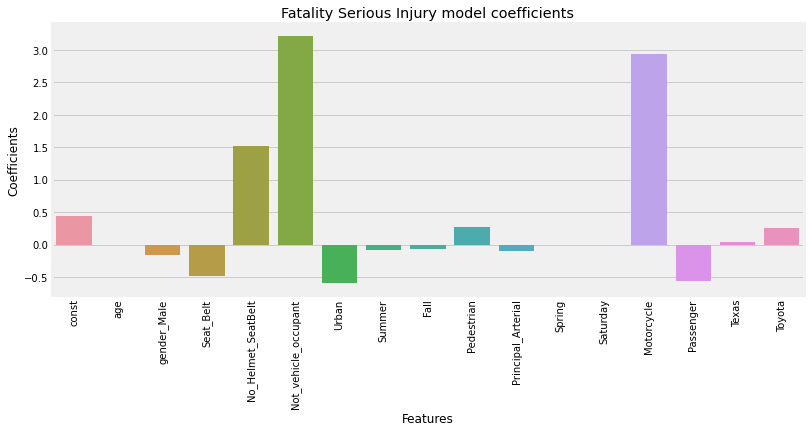

In [138]:
plt.figure(figsize=(12,5))
sns.barplot(x='Features',y='Coefficients',data=d1)#, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Fatality Serious Injury model coefficients")
plt.savefig('coefficient_barplot.png')

## LR Accuracy

In [75]:
##K-FOLD CROSS VALIDATION OF THE SAME 16 FEATURE MODEL
scores = cross_val_score(lm3, X_train[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']], y_train, scoring='accuracy', cv=5)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.73342586 0.72637984 0.73104847 0.7278454  0.73905616]
Accuracy: 0.732 (0.004)


In [76]:
lm3.intercept_, lm3.coef_

(array([0.45075552]),
 array([[ 1.45147949e-03, -1.62227445e-01, -4.87075399e-01,
          1.51773602e+00,  3.15118113e+00, -5.88254572e-01,
         -8.16762137e-02, -7.04883371e-02,  3.49131054e-01,
         -1.04681703e-01, -7.69061706e-03, -1.72813053e-03,
          2.90644860e+00, -5.71124657e-01,  4.23741203e-02,
          2.48547290e-01]]))

The scores of all 16 feature models are close and the coefficients and intercept of the
sklearn model are same as that of the stasmodel output. 

## LR Confusion Matrix

In [57]:
y_predict = lm3.predict(X_val[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']]) 

confusion_matrix(y_val, 
                 y_predict)

array([[5975, 1042],
       [3193, 5401]])

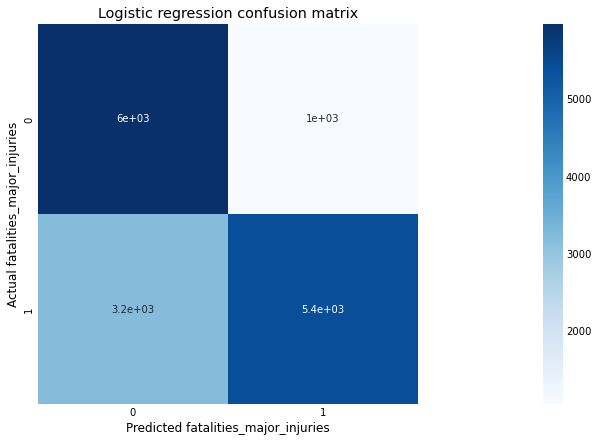

In [58]:
# # SAME CONFUSION MATRIX AS ABOVE JUST AS A HEATMAP
# logit_confusion = confusion_matrix(y_val, y_predict)
# plt.figure#(dpi=150)
# sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True)
#            #xticklabels=iris_dataset['target_names'],
#            #yticklabels=iris_dataset['target_names'])

# plt.xlabel('Predicted fatalities_major_injuries')
# plt.ylabel('Actual fatalities_major_injuries')
# plt.title('Logistic regression confusion matrix');

# plt.savefig("confusion_matrix_logit")

Same confusion matrix as above in the form of a **heatmap and with slider** to change the 
threshold.

In [59]:
y_proba = lm3.predict_proba(X_val[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']])[:, 1]

In [159]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_proba = (model.predict_proba(X_val[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']])[:, 1])>= threshold
    confusion = confusion_matrix(y_val, y_proba)
    plt.figure(dpi=50)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    sns.set(context='notebook', style='whitegrid', font_scale=1.5)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
           #xticklabels=['legit', 'fraud'],
           #yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction', fontsize=18)
    plt.ylabel('actual',fontsize=18)
    

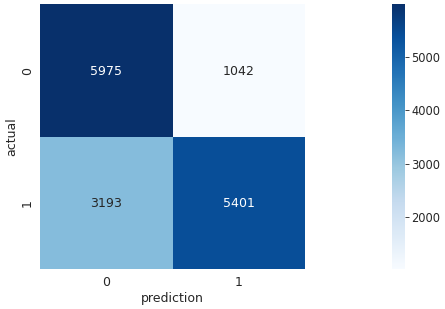

In [160]:
make_confusion_matrix(lm3)
plt.savefig("confusion_matrix_logit")
# from seaborn import PairGrid
# %config InlineBackend.figure_formats = ['svg']  # or svg
# %matplotlib inline

# sns.set(context='notebook', style='whitegrid', font_scale=0.7)
# # fig, ax = plt.subplots()
# forest_importances.plot.bar(ax=ax)
# plt.rcParams["figure.figsize"] = (40, 7)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.title("Feature importance", fontsize=40)
# #plt.xlabel("F score", fontsize=16)
# plt.ylabel("Features", fontsize=18)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# #fig.tight_layout()
# plt.savefig('features.png')

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

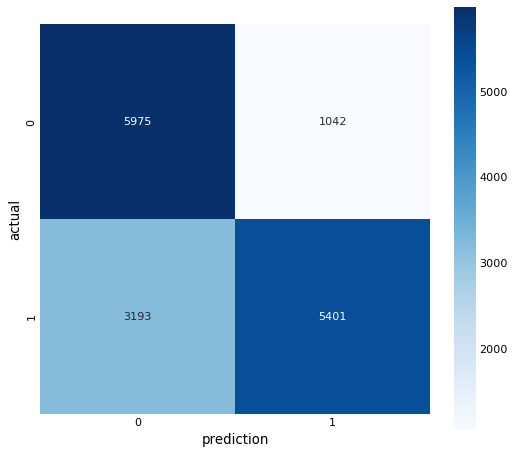

In [140]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(lm3, threshold), threshold=(0.0,1.0,0.02))

## LR ROC 

In [91]:
# # Both models ROC Curve comparison
# plt.figure(figsize=(10,10))
# lw = 2
# plt.plot(fpr, tpr, color='blue', lw=lw, 
#          label='Logistic curve (area= %0.2f)' %roc_auc_lr)
# plt.plot(rf_fpr, rf_tpr, color='red', lw=lw, 
#          label='Random Forest curve (area= %0.2f)' %roc_auc_rf)
# plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves')
# plt.legend(loc='lower right');

In [92]:
#y_proba1_rf = (randomforest.predict_proba(X_val)[:,1] > 0.06)

In [93]:
# def plot_roc(true, probas):
#     auc = roc_auc_score(true, probas)

#     plt.plot(fpr, tpr, marker='o')
#     plt.xlabel('1 - Specificity (FPR)')
#     plt.ylabel('Sensitivity (TPR)');
#     plt.title(f"Area Under the ROC Curve: {round(auc, 3)}");

In [94]:
# plot_roc(y_val, y_proba)
# # plot_roc(y_val, y_proba1_rf)

In [142]:
fpr, tpr, thresholds = roc_curve(y_val, lm3.predict_proba(X_val[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']])[:,1])

ROC AUC score =  0.7964914009658183


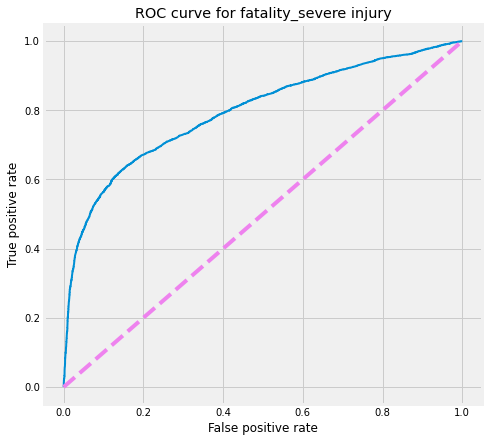

In [144]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

#plt.figure(figsize=(12,5))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fatality_severe injury');
print("ROC AUC score = ", roc_auc_score(y_val, lm3.predict_proba(X_val[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']])[:,1]))
plt.savefig("ROC curve logit")

In [97]:
mask = tpr > 0.9
thresholds[mask].max()

0.3180993729761383

### Precision, Recall, F1

In [98]:
# using the default threshold of 0.5
#y_predict = lm.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
lm3_f1 = f1_score(y_val, y_predict)
print('F1: %.4f' % (lm3_f1))

Default threshold:
Precision: 0.8383,   Recall: 0.6285
F1: 0.7184


In [99]:
# using a threshold of 0.06
y_proba1 = (lm3.predict_proba(X_val[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']])[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_proba1), 
                                                     recall_score(y_val, y_proba1)))


Threshold of 0.06:
Precision: 0.5505,   Recall: 1.0000


<Figure size 864x360 with 0 Axes>

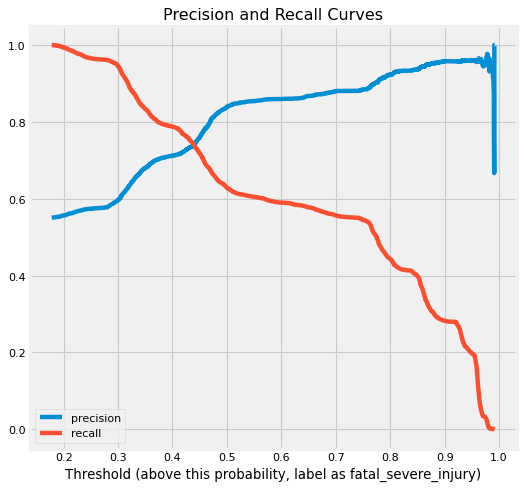

In [146]:
# Precision & recall curve

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, lm3.predict_proba(X_val[['age', 'sex_Male', 'restraint_system_helmet_use_name_Lap and Shoulder Belt Used', \
                  'restraint_system_helmet_use_name_None Used','restraint_system_helmet_use_name_Not a Motor Vehicle Occupant', \
                  'land_use_name_Urban', 'season_3', 'season_4', 'person_type_name_Pedestrian', \
                  'functional_system_name_Principal Arterial – Other', 'season_2', 'day_of_week_num_5', \
                  'body_type_name_Motorcycle', 'person_type_name_Passenger of a Motor Vehicle In-Transport',\
                  'state_number_48', 'vehicle_make_name_Toyota']])[:,1] )

plt.figure(figsize=(12,5))
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fatal_severe_injury)');
plt.title('Precision and Recall Curves');
plt.savefig("Precision Recall curve logit")